In [4]:
import torch
from torchvision import datasets, transforms
import torchvision.transforms as transforms
import numpy as np
from sklearn.utils import resample
from pyclustertend import vat
from sklearn.preprocessing import StandardScaler

## Aplicando VAT

O VAT exige um X de 2 dimensões e isso conflita com o modelo ART.

Por isso, decidi separar essa parte do código.

X: (7291, 16, 16)  y: (7291,)


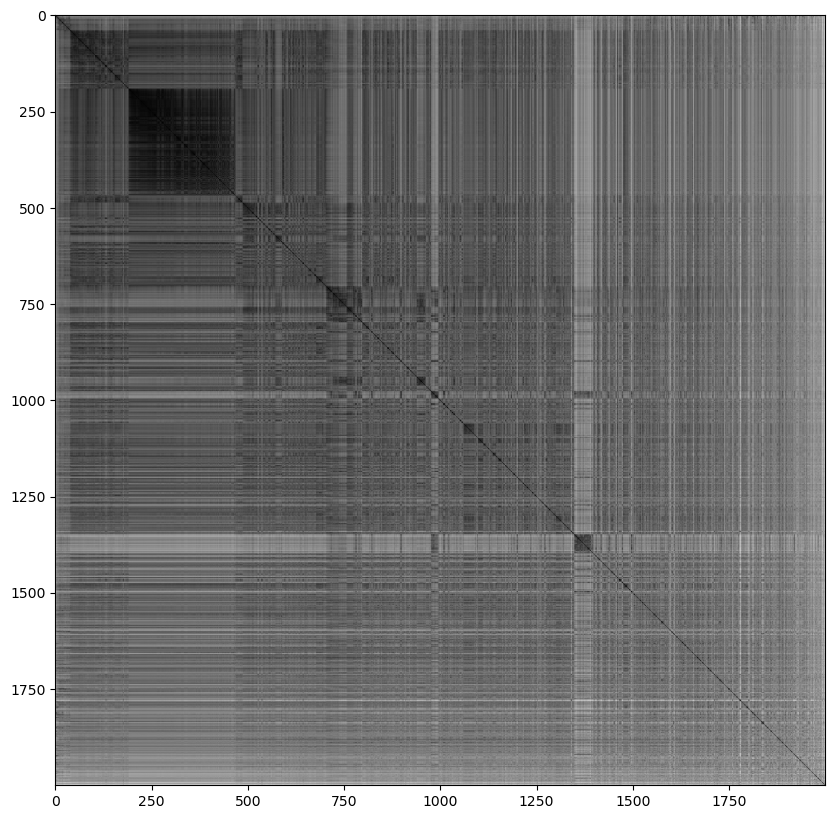

In [3]:
transform = transforms.ToTensor()
full_dataset = datasets.USPS(root='./data', train=True, download=True, transform=transform)

X_list = []
y_list = []

for img, label in full_dataset:
    X_list.append(img.numpy().squeeze())  # shape (16,16)
    y_list.append(label)

X = np.array(X_list)  # (7291, 16, 16)
y = np.array(y_list)  # (7291,)
print("X:", X.shape, " y:", y.shape)

# Achatando os dados
# Isso é necessário para o scaler
nsamples, h, w = X.shape
X_flat = X.reshape((nsamples, h * w))  # (7291, 256)

scaler = StandardScaler()
X_flat_scaled = scaler.fit_transform(X_flat)

X_sample = resample(X_flat_scaled, n_samples=2000, random_state=42)

vat(X_sample)


De acordo com a documentação da biblioteca, a forma de interpretar a imagem é contando o número de quadrados pretos na diagonal principal. Esse valor pode representar o número de clusters.